# Neural & Behavioral Modeling - Week 14 (Exercises)
by Your Name (Your Email)

In [1]:
# Upgrade PyTorch to 0.4.0 if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pytorch-cpu
  - torchvision-cpu

Current channels:

  - https://conda.anaconda.org/pytorch/osx-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

In [3]:
# Check GPU status:
import torch as t
t.manual_seed(1)    # for reproduction
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    device = t.device("cpu")
    print('No GPU')

PyTorch version: 0.4.0
No GPU


## 1 Activation/Signal Function in RNN (10 points)

tanh(x) is a more popular choice of activation function than sigmoid(x) & relu(x) in contemporary RNNs.
Below please use simple RNN to compare 3 activation functions in terms of their learning efficiency and capacity. If there is any significant difference, please discuss why. 

nn.RNN(..., nonlinearity='relu') allows you to switch tanh to relu. However, you need some deep hacking of the source code to replace nn.Tanh with nn.Sigmoid. Alternatively, you can <a href="https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/">code a simple RNN from scratch</a> to have a better control of everything!

### 1.0 Data: sin(t) → cos(t)

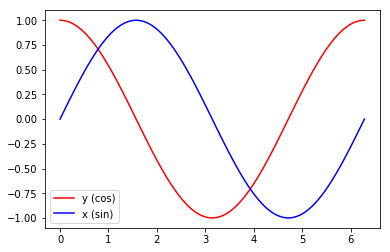

In [5]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plot(steps, y_np, 'r-', label='y (cos)')
plot(steps, x_np, 'b-', label='x (sin)')
legend(loc='best');

### 1.1 RNN model for 1D-to-1D time-series regression (7 points)

In [8]:
optimizer = t.optim.Adam(rnn.parameters(), lr=0.01)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sine to predict cosine
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = t.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = t.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    h_state = h_state.data                  # get rid of the autograd part and retain the data part only
 
    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    clf() # clear previous figure
    plot(steps, y_np.flatten(), 'r-', label='target')
    plot(steps, prediction.data.numpy().flatten(), 'b-', label='prediction')
    title(loss.item()); legend(loc=9)
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

NameError: name 'nn' is not defined

### 1.2 Conclusions (3 points)

Please write your discussion here.